-Reading data

In [3]:
import pandas as pd

df = pd.read_csv("heart_disease (2).csv")
print(df.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  num  
0    3.0  0.0   6.0    0  
1    2.0  3.0   3.0    2  
2    2.0  2.0   7.0    1  
3    3.0  0.0   3.0    0  
4    1.0  0.0   3.0    0  


In [4]:
#seperating
X = df.drop('num', axis=1)
y = df['num']


-Feature importance (Random Forest)

In [5]:
#imports
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importance = rf.feature_importances_
featureImportance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

-Visualization

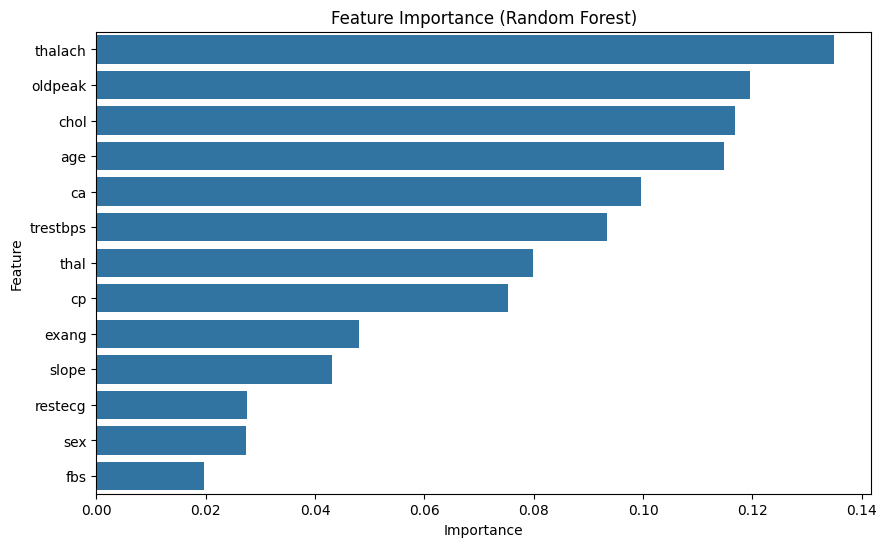


Top Features by Random Forest:
     Feature  Importance
7    thalach    0.135002
9    oldpeak    0.119577
4       chol    0.116745
0        age    0.114771
11        ca    0.099649
3   trestbps    0.093390
12      thal    0.079862
2         cp    0.075344
8      exang    0.048012
10     slope    0.043058
6    restecg    0.027543
1        sex    0.027361
5        fbs    0.019686


In [7]:
plt.figure(figsize=(10,6))
sns.barplot(data=featureImportance, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

print("\nTop Features by Random Forest:")
print(featureImportance)

-RFE


In [15]:
#imports
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [18]:
# at first i tried to do the RFE without scaling and  it failed as itreations stopped even after increasing the limit so be aware of the scaling step
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# i also tried without the solver it didnt work as the data set is small so it works better than lbfgs
logreg = LogisticRegression(max_iter=5000, solver='liblinear')
selector = RFE(logreg, n_features_to_select=8)  # Select top 8 features
selector.fit(X, y)

selectedFeatures = X.columns[selector.support_]
print("\nSelected Features using RFE:")
print(selectedFeatures)



Selected Features using RFE:
Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca'], dtype='object')


CHI SQUARE

In [19]:
#imports
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler() #chi need all values to be +ve
X_scaled = scaler.fit_transform(X)

In [21]:

selector = SelectKBest(score_func=chi2, k=8)  # Select top 8 features
selector.fit(X_scaled, y)

selected_features_chi2 = X.columns[selector.get_support()]
chi2Scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': selector.scores_
}).sort_values(by='Chi2 Score', ascending=False)

print("\nChi-Square Test Scores:")
print(chi2Scores)
print("\nSelected Features using Chi-Square Test:")
print(selected_features_chi2)


Chi-Square Test Scores:
     Feature  Chi2 Score
12      thal   48.012868
8      exang   41.534482
11        ca   35.395825
9    oldpeak   16.451213
10     slope   14.046618
2         cp    8.234094
1        sex    7.499223
6    restecg    7.028775
5        fbs    6.658223
7    thalach    3.133976
0        age    1.244886
3   trestbps    0.622014
4       chol    0.175931

Selected Features using Chi-Square Test:
Index(['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal'], dtype='object')


Final Result :

In [24]:
final_selected_features = set(selectedFeatures) & set(selected_features_chi2) & set(featureImportance['Feature'][:8])
print("\nFinal Selected Features for Modeling:")
print(final_selected_features)

# Saving reduced data
df_reduced = df[list(final_selected_features) + ['num']]
df_reduced.to_csv("selectedfeatures.csv", index=False)
print("\nSaved 'selectedfeatures.csv' with selected features!")


Final Selected Features for Modeling:
{'cp', 'ca', 'oldpeak'}

Saved 'selectedfeatures.csv' with selected features!
